In [2]:
############ Final Lab Week 1 ################

In [95]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# 1. & 2. Problem and Getting Data

In [5]:
# Data Description: 
# Goal: Trying to predict the "Total Claim Ammount"  --> target = total claim amount

In [6]:
# Reading the File
data = pd.read_csv('marketing_customer_analysis.csv')

In [7]:
data.shape

(9134, 24)

In [8]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# 3. Cleaning, Wrangling, EDA

In [12]:
# Standardizing header names

In [13]:
data.columns = map(str.lower, data.columns)

# other possibility:
# data.columns = cols
# cols = []
# for i in range(len(data.columns)):
#    cols.append(data.columns[i].lower())  #Kleinbuchstaben für die Spaltennamen

In [14]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
# Dropping dulicates in the customer column
data.duplicated(subset=['customer']) #shows duplcate value for each row
data = data.drop_duplicates('customer') # drops every duplicate in customer columnb

In [16]:
# Deal with NaValues

In [17]:
data.isnull().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [18]:
#data.isna().sum()/data.shape[0]*100
pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

,0
customer,0.0
state,0.0
customer lifetime value,0.0
response,0.0
coverage,0.0
education,0.0
effective to date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


In [19]:
# Handling dates
data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')

In [20]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
# Categorical & Numerical Features

In [22]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(include=[np.object])

In [23]:
numeric_data.shape

(9134, 8)

In [24]:
numeric_data.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [25]:
categorical_data.shape

(9134, 15)

In [26]:
categorical_data.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [27]:
# 3.5 Exploration of the data

In [28]:
#measures of central tendency

In [29]:
data.describe(include='all')

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,VQ65197,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN


In [73]:
data.describe(include=[np.object])

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,VQ65197,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [30]:
#Plotting the data

In [31]:
# for i in range(numericals.shape[1]):
#     plt.scatter(numericals[numericals[i]], numericals['total_claim_amount'])
#     plt.show()

In [32]:
categorical_data = categorical_data.drop(['customer'], axis = 1)

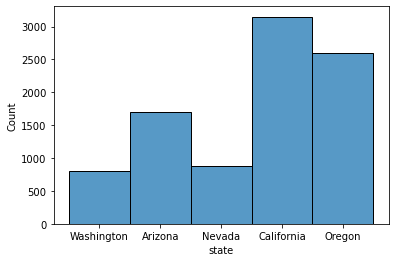

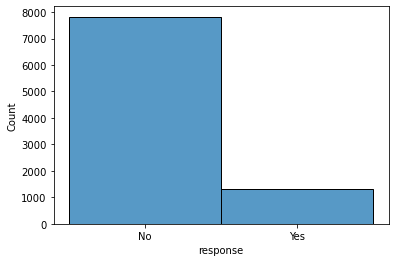

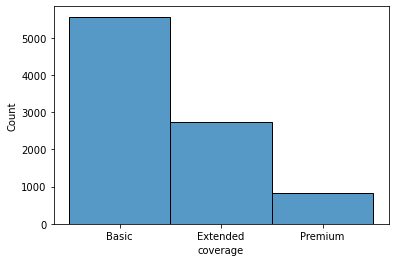

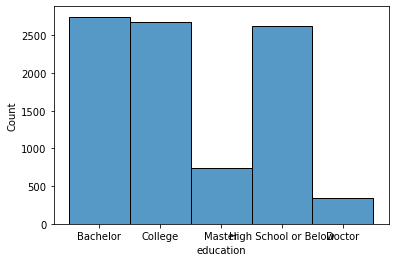

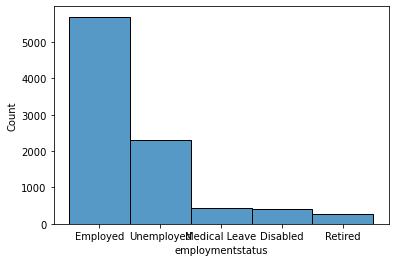

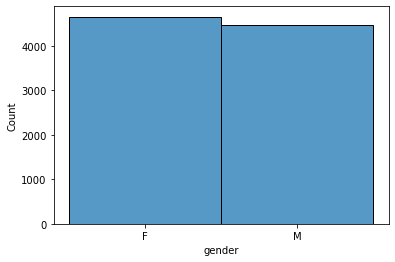

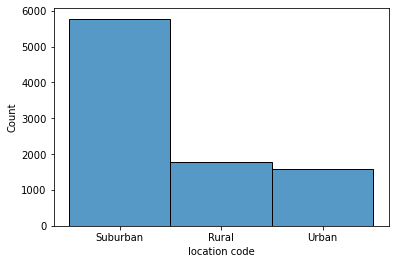

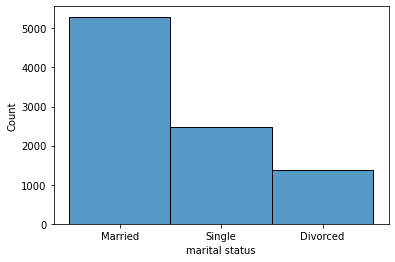

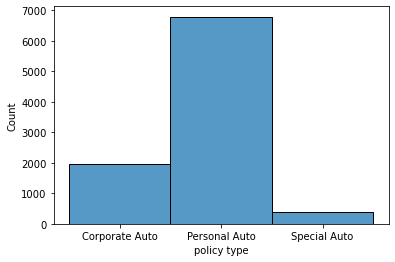

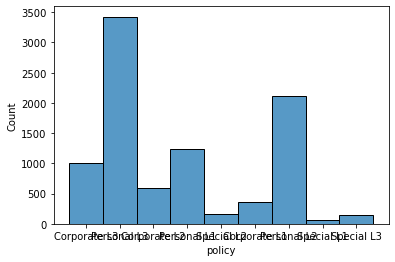

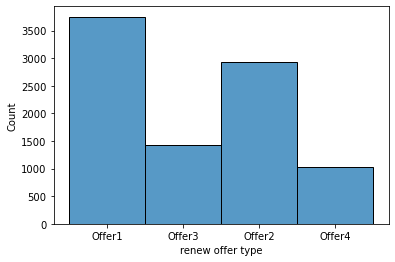

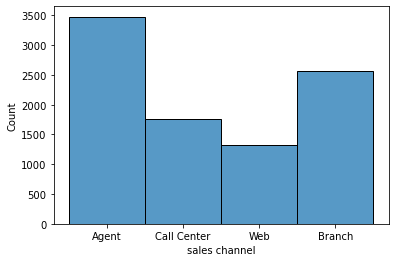

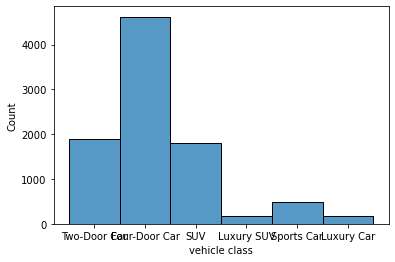

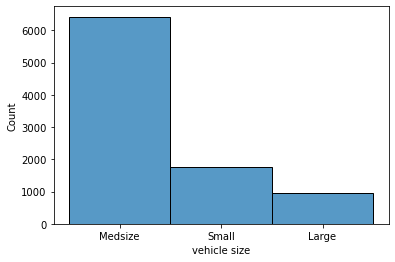

In [33]:


for i in range(categorical_data.shape[1]):
    sns.histplot(categorical_data[categorical_data.columns[i]], bins=40)
    plt.show()
    

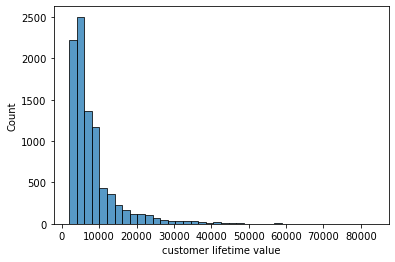

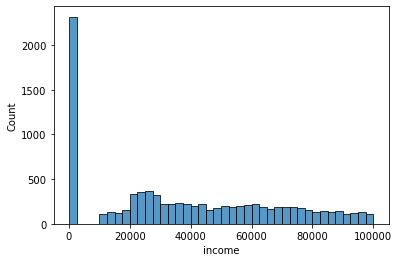

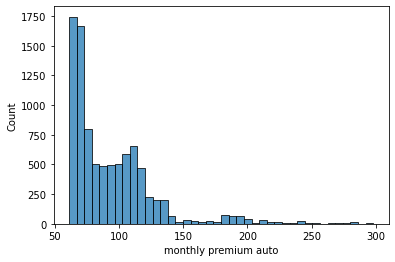

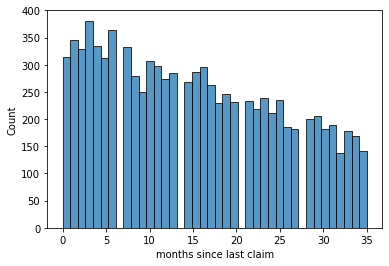

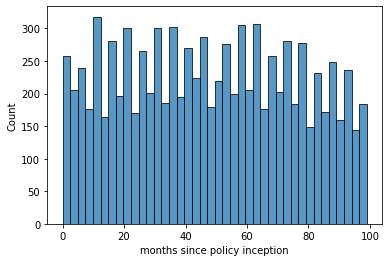

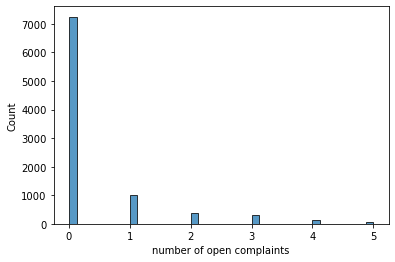

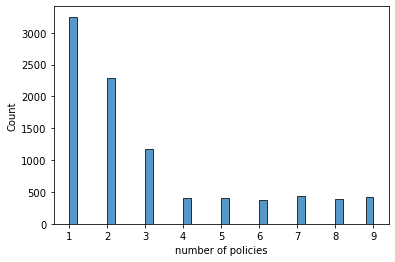

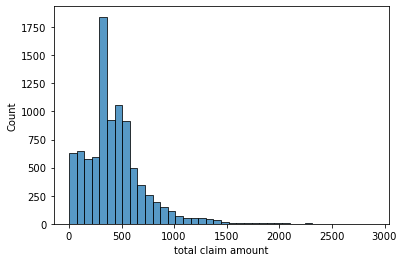

In [34]:
for i in range(numeric_data.shape[1]):
    sns.histplot(numeric_data[numeric_data.columns[i]], bins=40)
    plt.show()

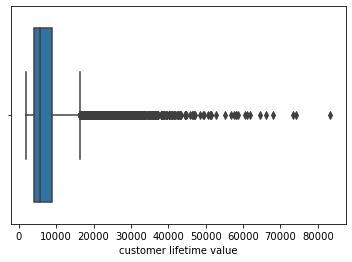

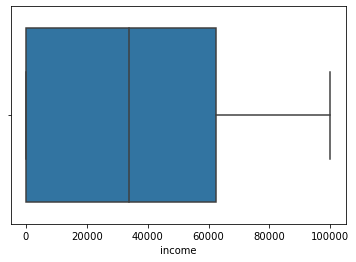

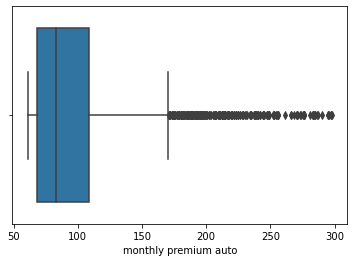

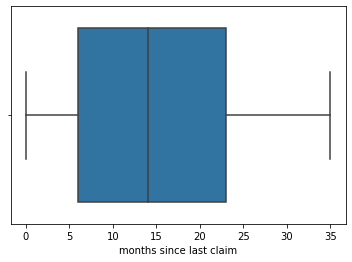

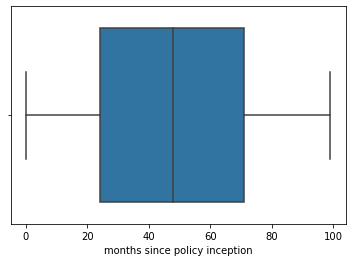

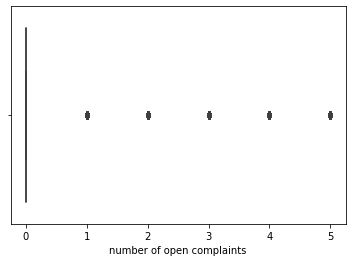

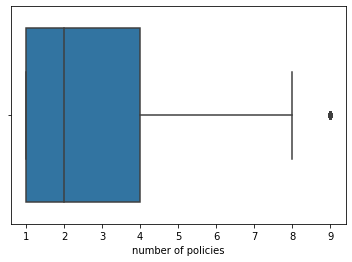

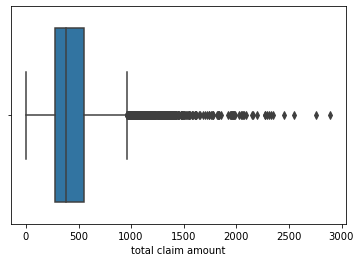

In [35]:
# sns.boxplot(y=numericals['income'], data=numericals)
for i in range(numeric_data.shape[1]):
    sns.boxplot(numeric_data[numeric_data.columns[i]])
    plt.show()

In [36]:
#Measures of central tendency - Mean, median, mode
#Measures of spread / dispersion - SD, var, range, quartiles, percentiles
#Meaures of frequency - Frequency

In [37]:
summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer lifetime value,9134.0,8004.94,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247
income,9134.0,37657.38,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000,62320.000000
monthly premium auto,9134.0,93.22,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000
months since last claim,9134.0,15.10,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000
months since policy inception,9134.0,48.06,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000
number of open complaints,9134.0,0.38,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
number of policies,9134.0,2.97,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000,3.000000
total claim amount,9134.0,434.09,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594


In [38]:
# Looking for Correlations

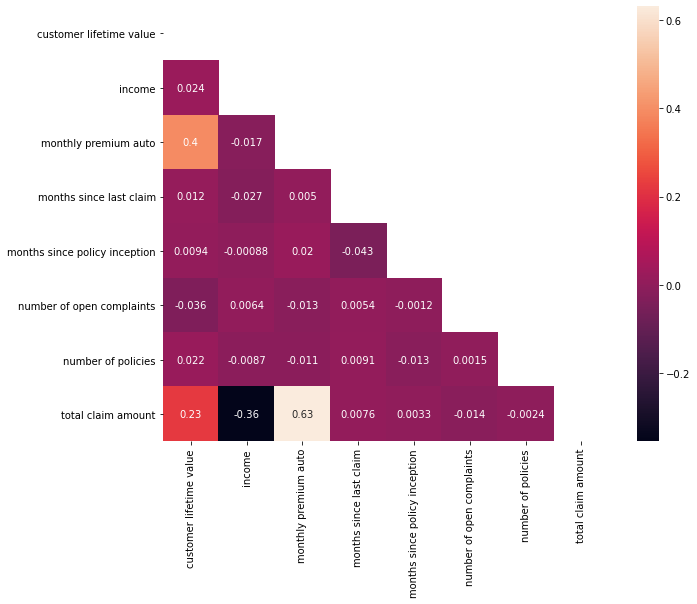

In [39]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


In [40]:
# 4. Dealing with outlier values

In [47]:
def logtransformclean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data['customer lifetime log'] = list(map(log_transform_clean, data['customer lifetime value']))

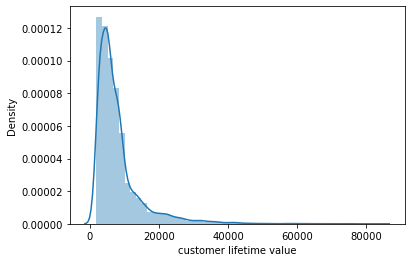

In [48]:
sns.distplot(data['customer lifetime value'])
plt.show()

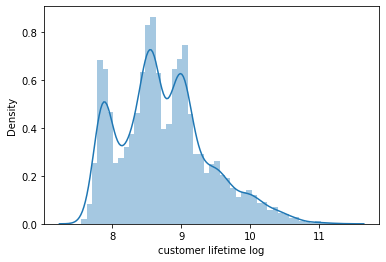

In [49]:
sns.distplot(data['customer lifetime log'])
plt.show()

In [50]:
data['monthly premium auto log'] = list(map(log_transform_clean, data['monthly premium auto']))

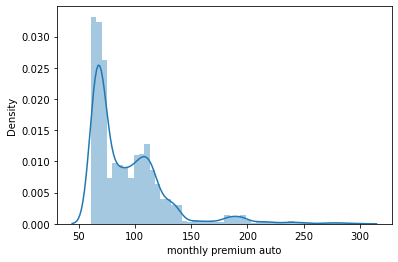

In [51]:
sns.distplot(data['monthly premium auto'])
plt.show()

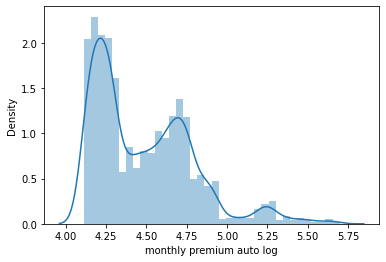

In [52]:
sns.distplot(data['monthly premium auto log'])
plt.show()

In [74]:
data_transf = data.drop(['customer lifetime value', 'customer lifetime log'], axis=1)

data_transf.head()
data_transf.shape

(9134, 25)

In [75]:
data_transf2 = data.drop(['monthly premium auto', 'monthly premium auto log'], axis=1)

data_transf2.head()
data_transf2.shape

(9134, 25)

In [ ]:
# Normalization 

In [ ]:
# normal = norm(0, math.sqrt(9)) #first argument is mean and the second is sigma
# a normal distribution has a mean of 0 and a sd of 3

In [60]:
meanmonthlypremiumauto = np.mean(data['monthly premium auto'])
meancustomerlifetimevalue =np.mean(data['customer lifetime value'])

In [71]:
print(meanmonthlypremiumauto)
print(meancustomerlifetimevalue)

93.21929056273265
8004.9404749870755


In [87]:
X_numerical = data_transf.select_dtypes(include = np.number)
X_categorical = data_transf.select_dtypes(include = np.object)
print(X_numerical.shape)
print(X_categorical.shape)

(9134, 9)
(9134, 15)


In [89]:
X_numerical_normalized.head()

,0,1,2,3,4,5,6,7,8
0,0.999976,0.001226,0.000569,0.000089,0.0,0.000018,0.006838,0.000141,0.000075
1,0.000000,0.082726,0.011441,0.036963,0.0,0.007040,0.995758,0.007789,0.003998
2,0.999930,0.002214,0.000369,0.000779,0.0,0.000041,0.011615,0.000194,0.000096
3,0.000000,0.194599,0.033045,0.119329,0.0,0.012851,0.972775,0.016416,0.008561
4,0.999993,0.001665,0.000274,0.001004,0.0,0.000023,0.003151,0.000181,0.000098


In [ ]:
#Encoding of the categorical data

In [98]:
X_categoricalclean = X_categorical.drop(['customer'], axis=1)

X_categoricalclean.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [105]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_categoricalclean)
X_categoricalclean_encoded = encoder.transform(X_categoricalclean).toarray()
X_catgoricalclean_encoded = pd.DataFrame (X_categoricalclean_encoded)


In [106]:
X_catgoricalclean_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Splitting the Data into test and and train set

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [114]:
X = np.concatenate((X_numerical_normalized, X_categoricalclean), axis=1)

In [115]:
#Y = data['TARGET_D'] we droped Y above
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.999976,0.001226,0.000569,0.000089,0.0,0.000018,0.006838,0.000141,0.000075,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.082726,0.011441,0.036963,0.0,0.007040,0.995758,0.007789,0.003998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.999930,0.002214,0.000369,0.000779,0.0,0.000041,0.011615,0.000194,0.000096,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.000000,0.194599,0.033045,0.119329,0.0,0.012851,0.972775,0.016416,0.008561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.999993,0.001665,0.000274,0.001004,0.0,0.000023,0.003151,0.000181,0.000098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
Y = data['total claim amount'] 


In [ ]:
# .random_state=100 function randoms the data 
# this function returns 4 arguments a, b, c, d = train_test_sp.....

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [119]:
pd.DataFrame(X_train).head

<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     0.000000  0.137369  0.033814  0.040154  0.000000  0.004227  0.989059   
1     0.000000  0.085321  0.004444  0.023996  0.000000  0.001778  0.996011   
2     0.999989  0.003029  0.000211  0.001159  0.000000  0.000079  0.003291   
3     0.000000  0.193603  0.022674  0.043604  0.000000  0.006977  0.979776   
4     0.000000  0.336108  0.015418  0.194264  0.000000  0.009251  0.920863   
5     0.999997  0.001096  0.000063  0.000348  0.000000  0.000032  0.002014   
6     0.000000  0.137194  0.000000  0.069722  0.000000  0.004498  0.987798   
7     0.000000  0.097488  0.040882  0.154094  0.000000  0.001572  0.982286   
8     0.999907  0.002762  0.001313  0.000136  0.000091  0.000045  0.013255   
9     0.999997  0.001662  0.000354  0.001446  0.000000  0.000031  0.000253   
10    0.999747  0.004513  0.000639  0.003874  0.000160  0.000040  0.021665   
11    0.999980  0.001281  0.000537

In [123]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression() 
model = lm.fit(X_train,y_train) #y_train is the data that my model uses to learn
predictions  = lm.predict(X_test) #here I make predictions on the test data
r2_score(y_test, predictions) # prediction here is only for testing; r2_score 
                            #tells how much variation in the results you can explain it can höchstens 1 sein

0.8077288048411032

In [143]:
mse = mean_squared_error(y_test, predictions) # function from sklearn, like r2
mse

15276.50516344443

In [149]:
rmse = math.sqrt(mse)
rmse

123.59816003260093

In [150]:
r2 = r2_score(y_test, predictions)
r2

0.8077288048411032

In [146]:
n = len(X_test) 
p = X_test.shape[1]

In [147]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8049523254886282

In [148]:
summary = data.describe().T
summary['income'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))
summary

,count,mean,std,min,25%,50%,75%,max,income
customer lifetime value,9134.0,8004.94,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247
income,9134.0,37657.38,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000,62320.000000
monthly premium auto,9134.0,93.22,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000
months since last claim,9134.0,15.10,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000
months since policy inception,9134.0,48.06,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000
number of open complaints,9134.0,0.38,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
number of policies,9134.0,2.97,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000,3.000000
total claim amount,9134.0,434.09,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594
customer_lv_log,9134.0,8.75,0.652919,7.548560,8.292612,8.662190,9.100767,11.330508,0.808156
customer lifetime log,9134.0,8.75,0.652919,7.548560,8.292612,8.662190,9.100767,11.330508,0.808156
